In [48]:
import pandas as pd
import numpy as np
import os 
import glob
import matplotlib.pyplot as plt

## Run this notebook to get model ready data csv!

If needed, spesify what etfs from final_etf_csv you want to exclude!

In [49]:
exclude_etfs = [
    #'GlobalPE'
]

In [50]:
folder_path = 'final_etf_csv'
merged_df = pd.DataFrame()

In [51]:
csv_files = glob.glob(os.path.join(folder_path, '*.csv'))

for file in csv_files:
    etf_name = os.path.splitext(os.path.basename(file))[0]
    
    df = pd.read_csv(file, index_col=0, parse_dates=True)
    
    if 'Price' in df.columns:
        merged_df[etf_name] = df['Price']

merged_df.index = pd.to_datetime(merged_df.index)


Reversing

In [52]:
merged_df = merged_df.iloc[::-1]

Excluding spesified columns

In [53]:
merged_df = merged_df.drop(columns=exclude_etfs)

In [54]:
merged_df.head()

,MSCI,FTSEREEL,LPX50PE,GlobalPE,FTSECORP,ICE BofA G0BC,ICE BofA EBL0,PE,ICE BofA HW00,FTSEGOV,MSCI ACWI,FTWBIGUSDT,FTSE EPRA,ICE BofA MERHE00,ICE BofA ER00,MSCI EMU,STOXX600,FTSECORPALT
Date,,,,,,,,,,,,,,,,,,
2004-11-08,857.404236,NaN,NaN,NaN,133.8503,164.574,135.795,920.85,142.031,133.4091,NaN,109.725293,NaN,116.206,174.681,NaN,NaN,114.269319
2004-11-09,857.429099,NaN,NaN,NaN,134.0579,164.683,135.977,922.40,142.007,133.6256,NaN,109.885012,NaN,116.282,174.910,NaN,NaN,114.340659
2004-11-10,857.135546,NaN,921.94,NaN,134.1118,164.586,136.047,921.94,141.893,133.6821,208.125798,109.672180,1531.09,116.451,174.992,121.379493,246.05,114.458908
2004-11-11,861.981622,NaN,920.77,NaN,134.4617,164.748,136.332,920.77,141.934,134.0548,209.248050,109.660350,1531.73,116.533,175.353,122.201252,248.32,114.432164
2004-11-12,865.451387,NaN,926.08,NaN,134.7325,165.151,136.611,926.08,142.101,134.3564,210.100340,109.566189,1536.16,116.613,175.696,121.965874,249.20,114.367007


In [55]:
def plot_each(merged_df):
    for etf_name in merged_df.columns:
        plt.figure(figsize=(10, 6))
        plt.plot(merged_df.index, merged_df[etf_name], label=etf_name)
        plt.title(f"Price Time Series for {etf_name}")
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()


## Plotting For Each Asset For Good Measure

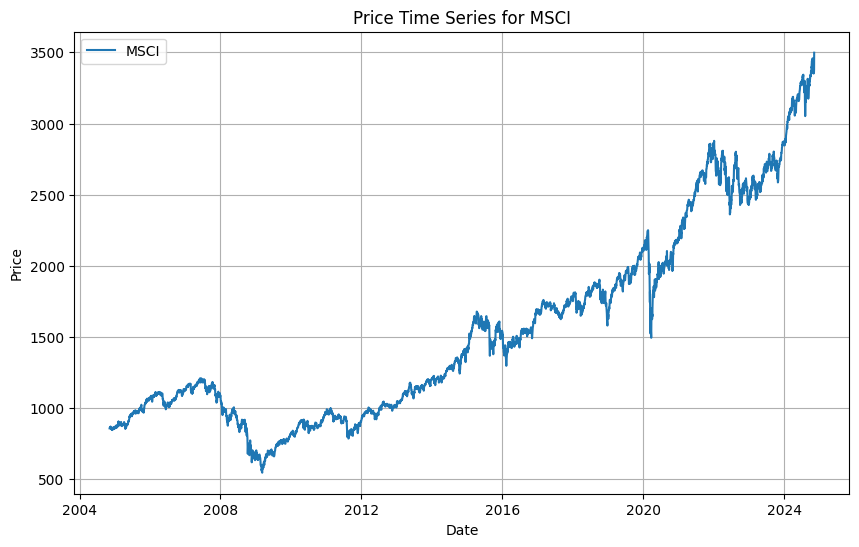

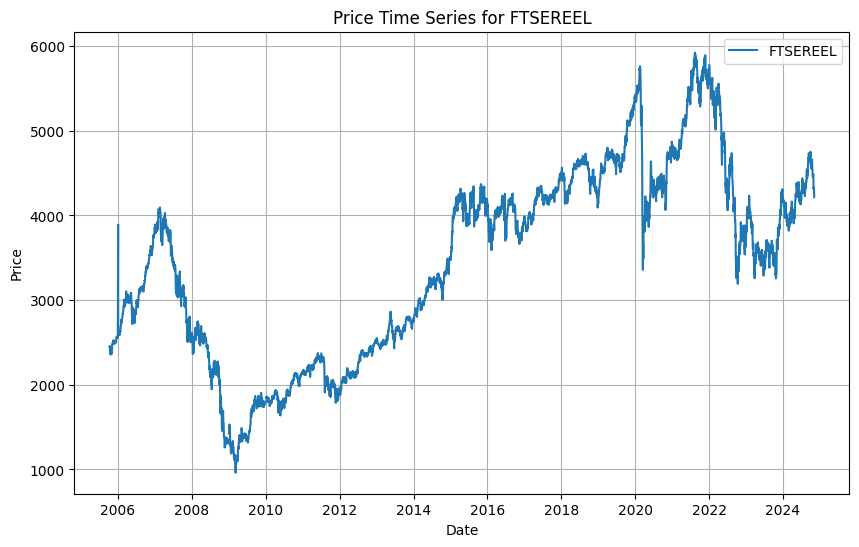

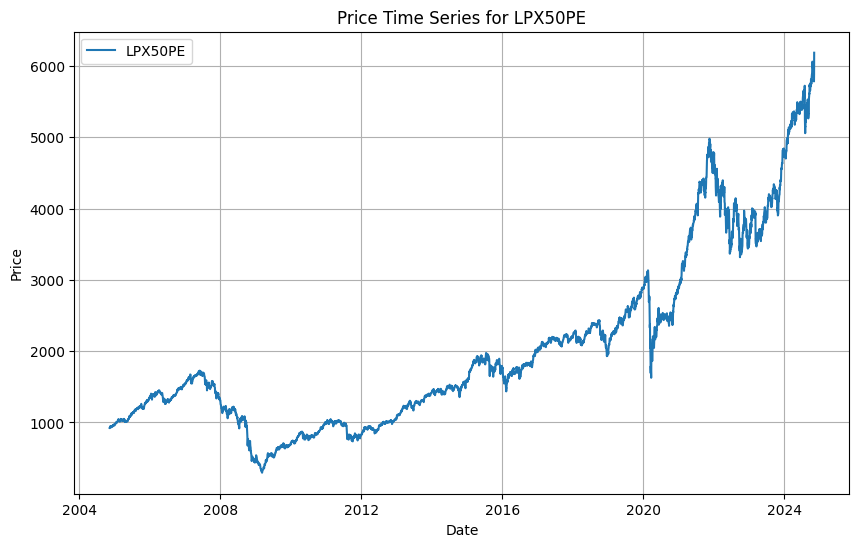

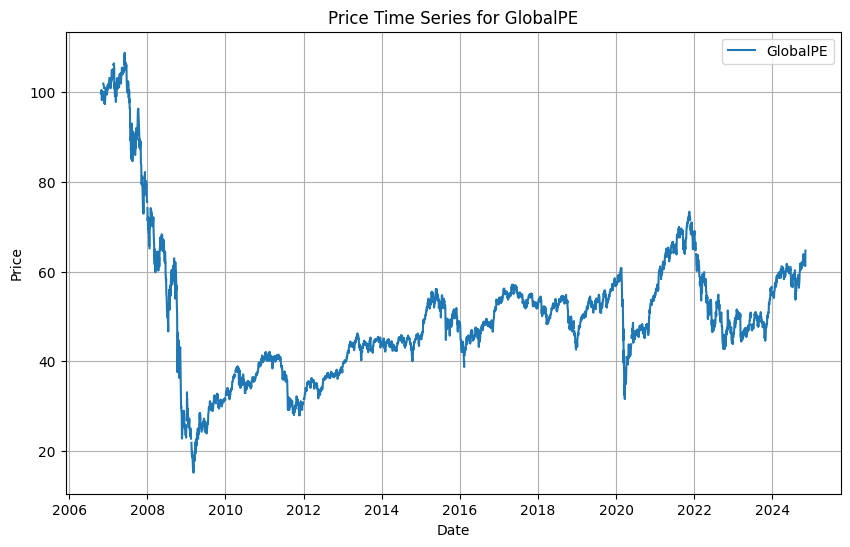

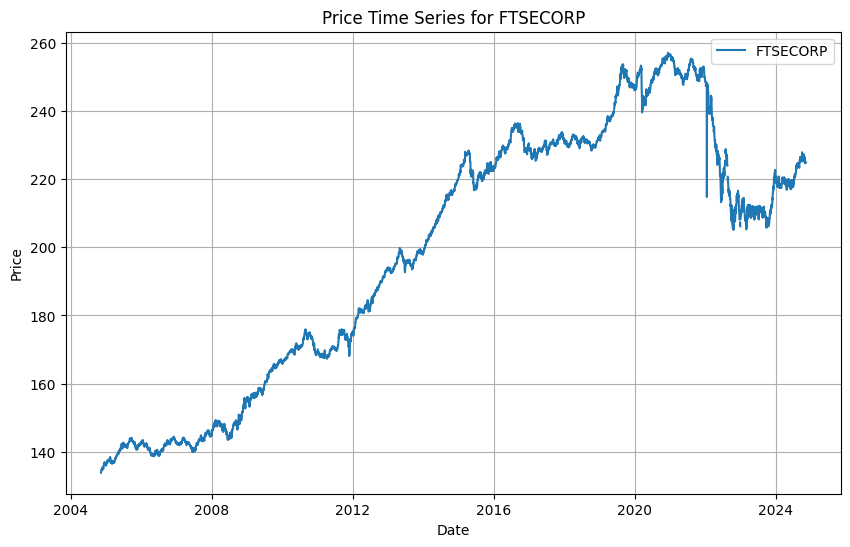

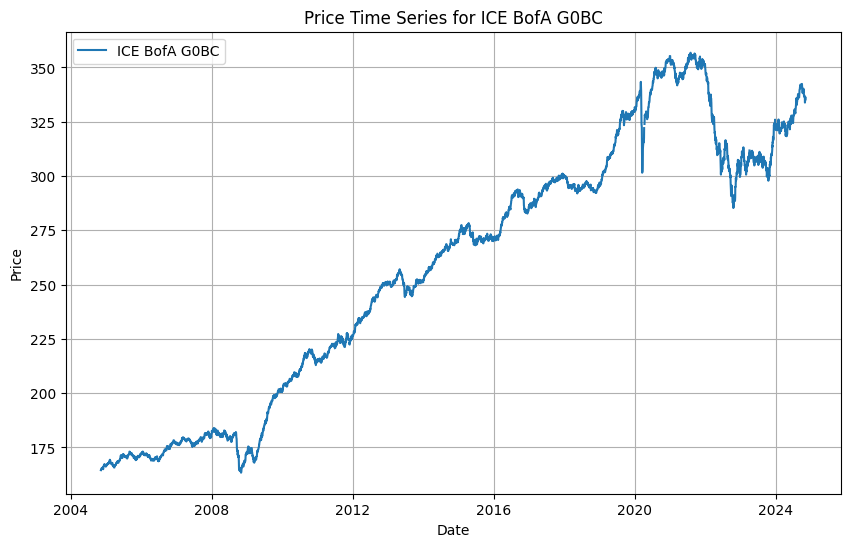

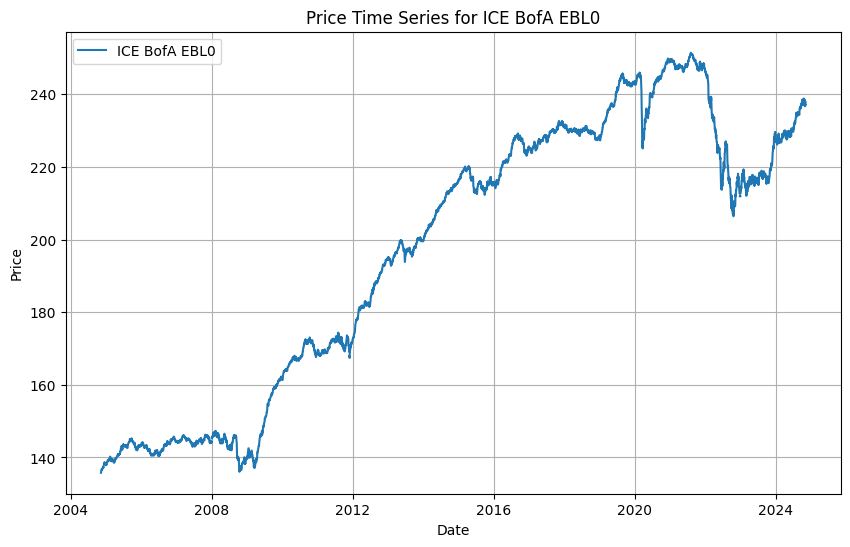

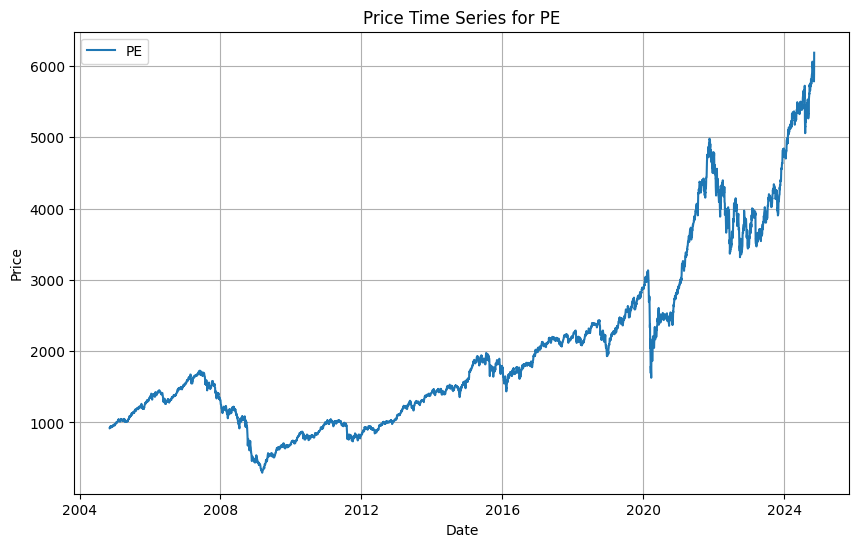

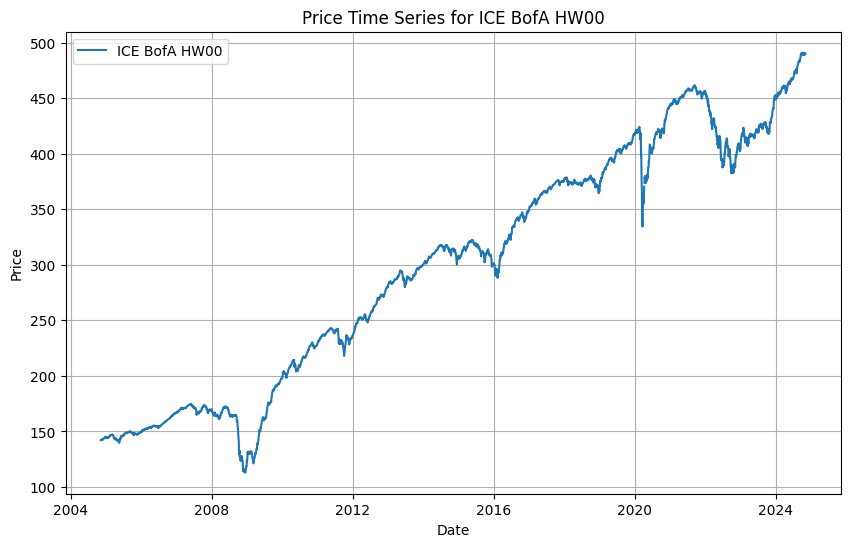

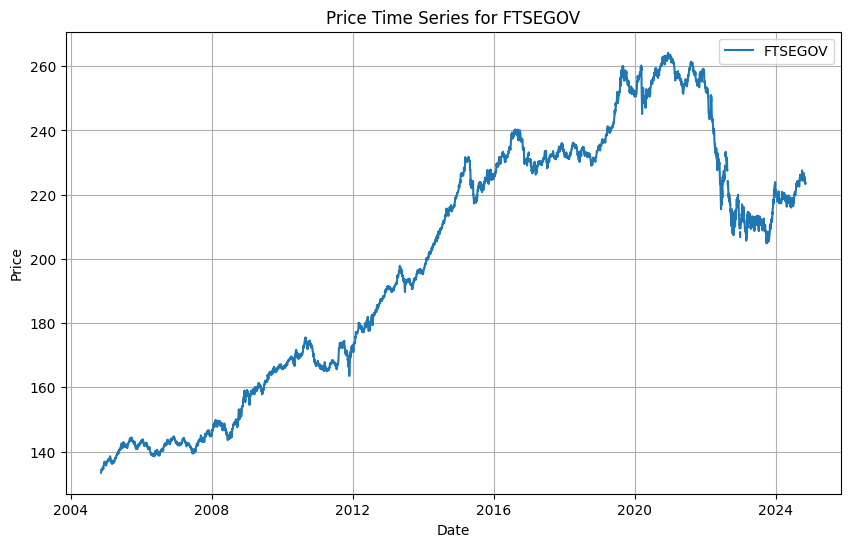

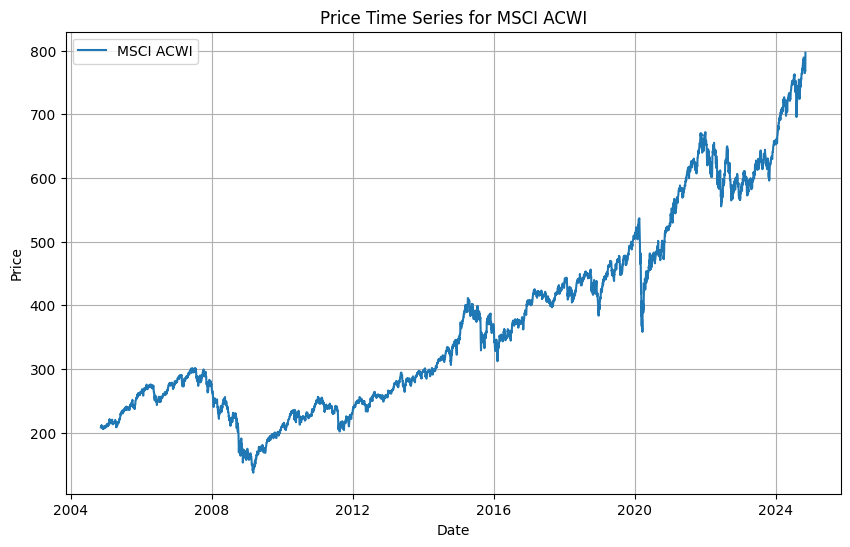

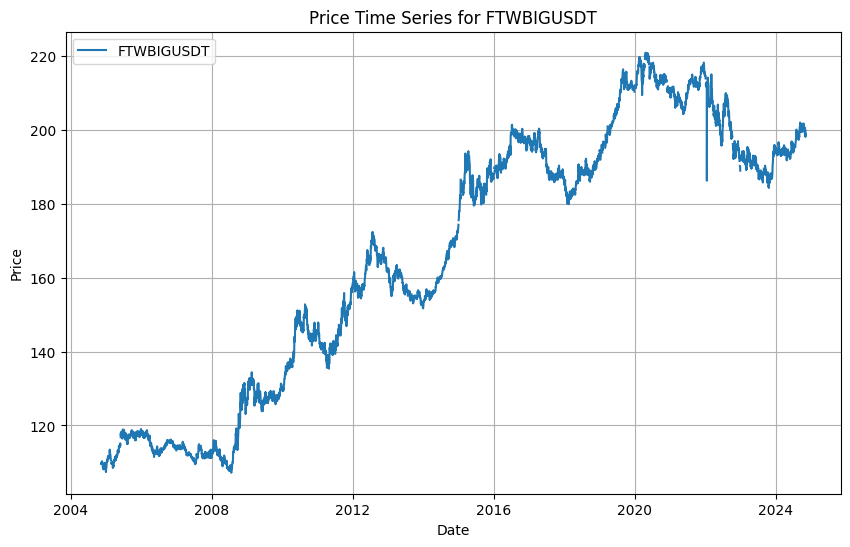

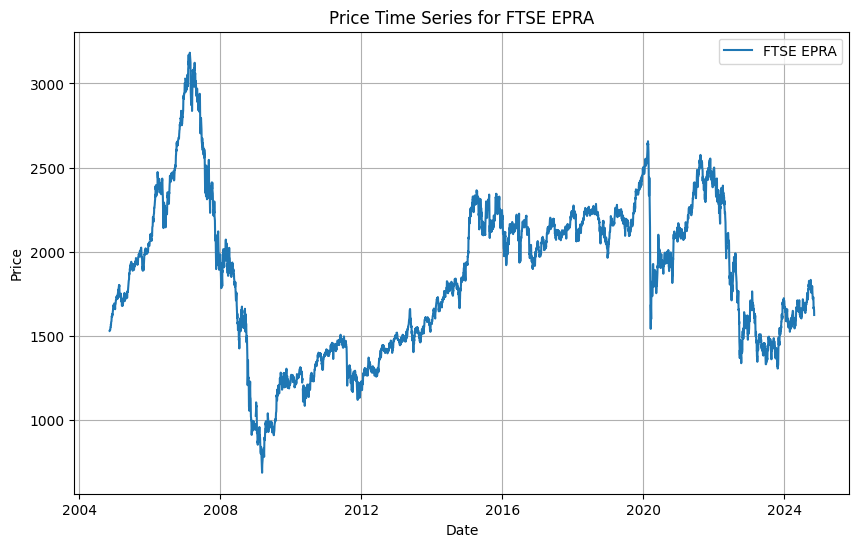

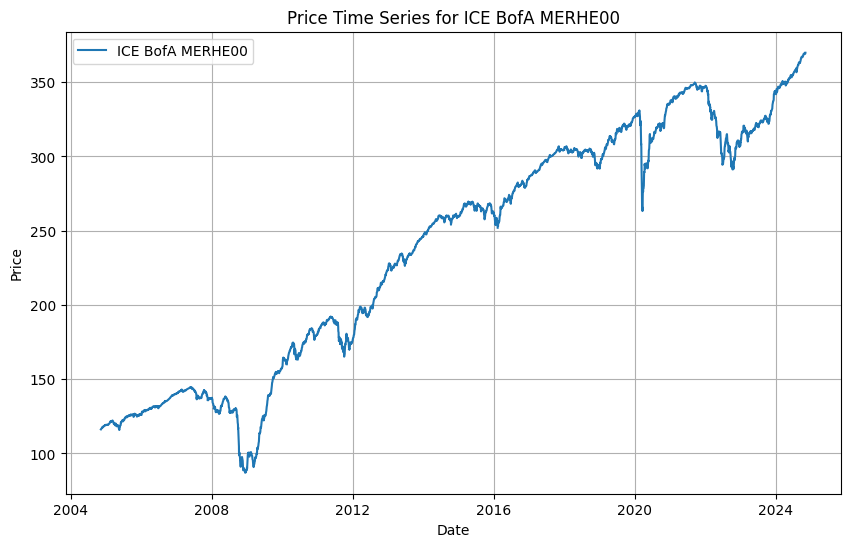

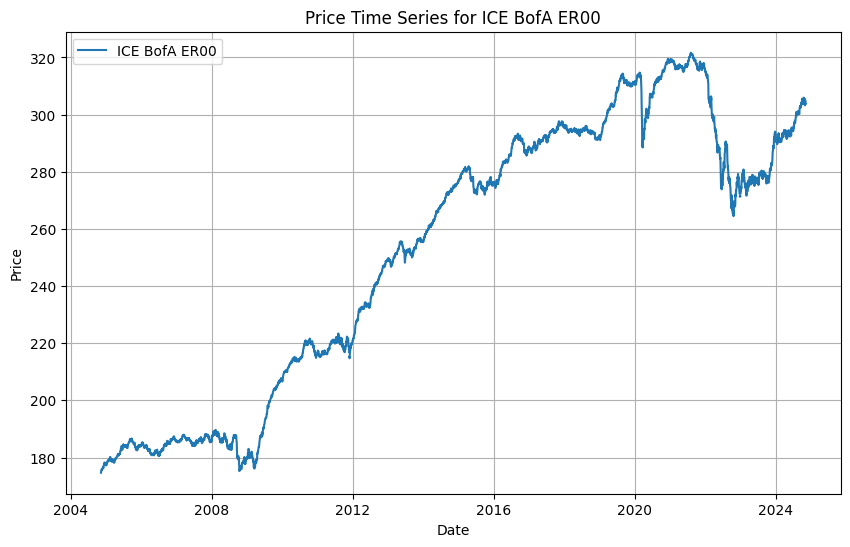

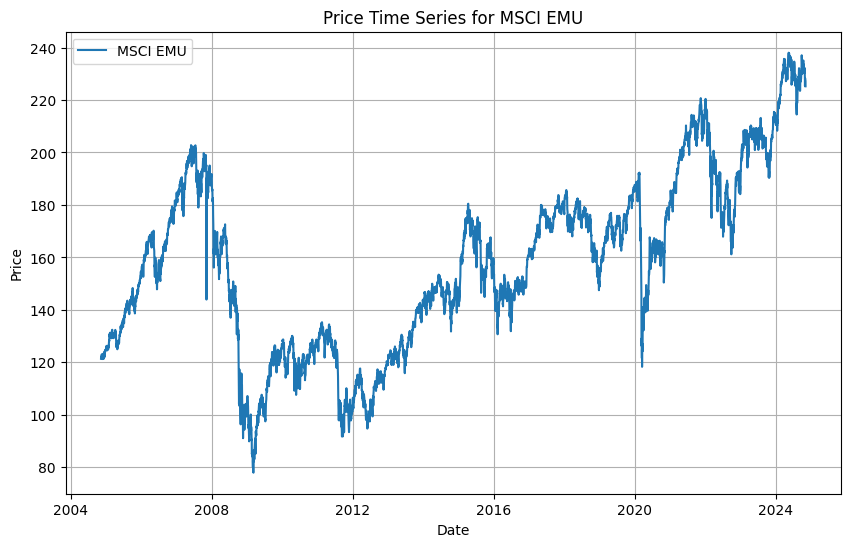

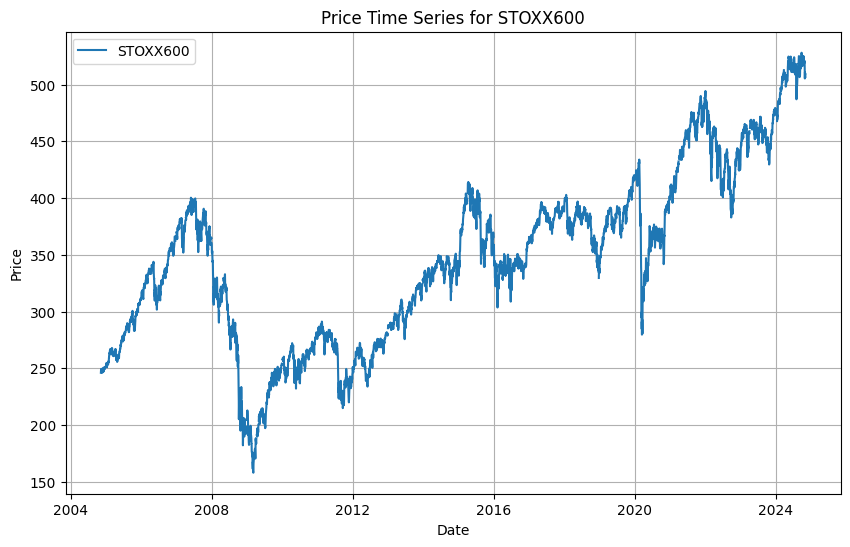

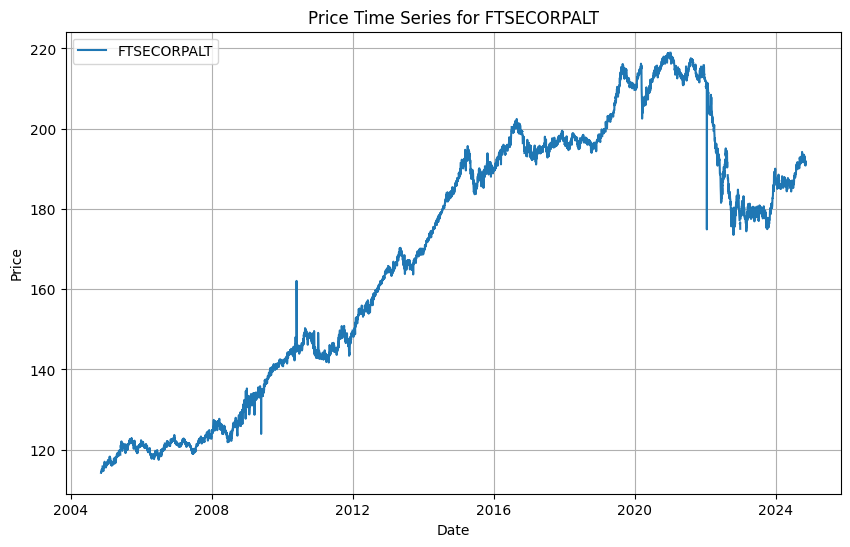

In [56]:
plot_each(merged_df)

## Plotting Everything Together

In [57]:
def all_in_one_plot(df):
    plt.figure(figsize=(12, 8))

    for column in df.columns:
        plt.plot(df.index, df[column], label=column)

    plt.title('Time Series of Various Financial Indicators')
    plt.xlabel('Date')
    plt.ylabel('Value')

    plt.legend(loc="best")

    plt.show()

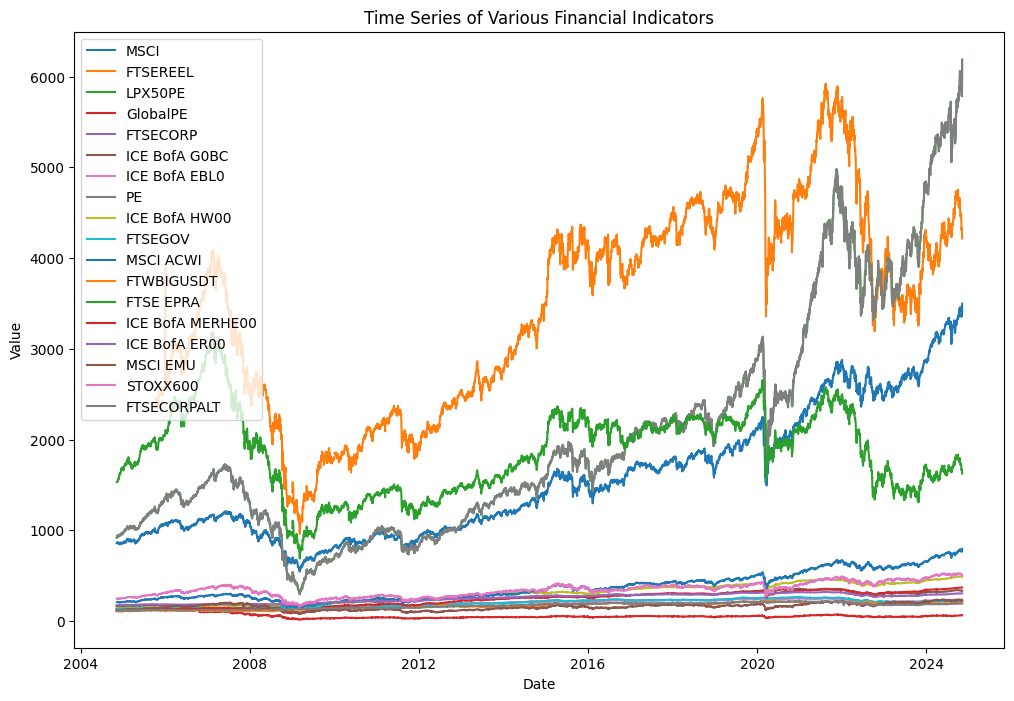

In [58]:
all_in_one_plot(merged_df)

In [59]:
# Find the earliest date where there is data in all columns (no NaNs)
earliest_date_with_data = merged_df.dropna().index.min()

# Filter the DataFrame to keep only rows from this earliest date onwards
merged_df = merged_df[merged_df.index >= earliest_date_with_data]

# Display the earliest date with complete data and the filtered DataFrame
print(f"Earliest date with complete data: {earliest_date_with_data}")
merged_df.head()


Earliest date with complete data: 2006-10-24 00:00:00


,MSCI,FTSEREEL,LPX50PE,GlobalPE,FTSECORP,ICE BofA G0BC,ICE BofA EBL0,PE,ICE BofA HW00,FTSEGOV,MSCI ACWI,FTWBIGUSDT,FTSE EPRA,ICE BofA MERHE00,ICE BofA ER00,MSCI EMU,STOXX600,FTSECORPALT
Date,,,,,,,,,,,,,,,,,,
2006-10-24,1126.975815,3425.78,1480.09,99.721800,142.2288,174.354,143.657,1480.09,161.657,142.3594,277.730789,115.461596,2672.82,137.246,184.770,174.530673,354.90,121.036618
2006-10-25,1127.951253,3430.16,1475.04,99.920535,142.1687,174.619,143.644,1475.04,161.723,142.2897,277.992579,115.386948,2676.16,137.315,184.754,174.910143,356.01,120.946546
2006-10-26,1126.814318,3433.95,1477.36,100.386104,142.3525,175.085,143.794,1477.36,162.016,142.4941,277.709410,115.198649,2679.12,137.519,184.941,174.968094,355.46,121.017970
2006-10-27,1118.602044,3435.11,1466.34,100.368643,142.7345,175.541,144.112,1466.34,162.265,142.9288,275.715055,115.403999,2680.02,137.619,185.342,174.630447,354.55,121.409788
2006-10-30,1116.002129,3426.93,1468.76,100.384344,142.9188,175.713,144.236,1468.76,162.429,143.1358,274.913287,115.592965,2673.64,137.684,185.499,174.048229,353.41,121.566305


This plot shows after we cut to where all indicies have data

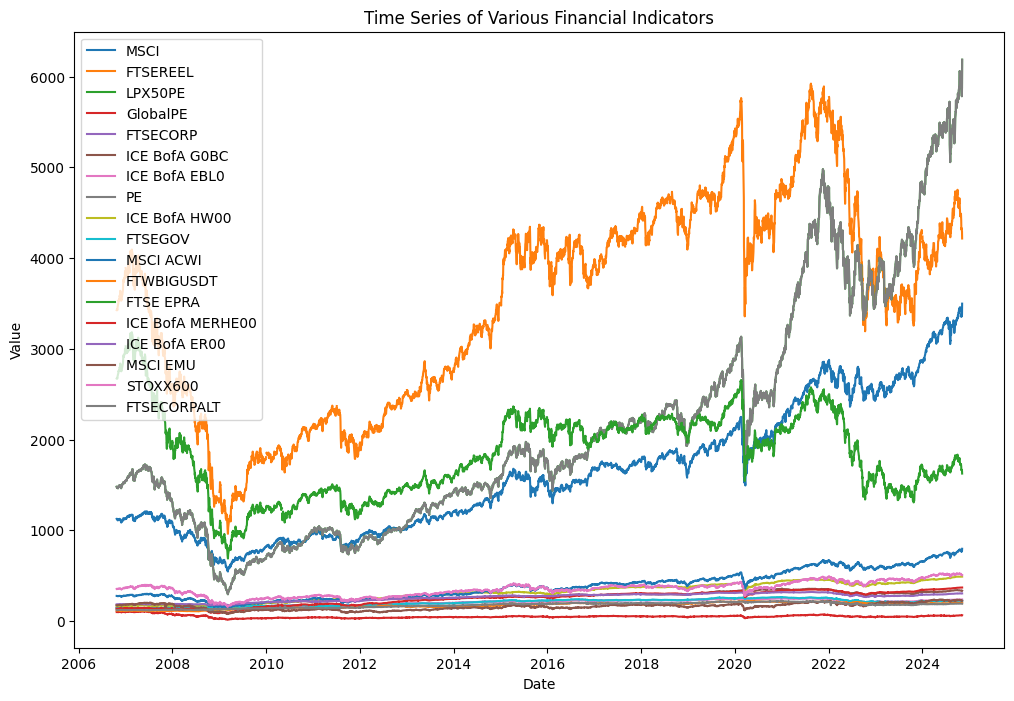

In [60]:
all_in_one_plot(merged_df)

In [61]:
starting_values = merged_df.iloc[0]

# Normalize each column by dividing all values by the starting value of that column
normalized_df = merged_df / starting_values

# Display the normalized DataFrame
print("Normalized DataFrame:")
normalized_df.head()

Normalized DataFrame:


,MSCI,FTSEREEL,LPX50PE,GlobalPE,FTSECORP,ICE BofA G0BC,ICE BofA EBL0,PE,ICE BofA HW00,FTSEGOV,MSCI ACWI,FTWBIGUSDT,FTSE EPRA,ICE BofA MERHE00,ICE BofA ER00,MSCI EMU,STOXX600,FTSECORPALT
Date,,,,,,,,,,,,,,,,,,
2006-10-24,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2006-10-25,1.000866,1.001279,0.996588,1.001993,0.999577,1.001520,0.999910,0.996588,1.000408,0.999510,1.000943,0.999353,1.001250,1.000503,0.999913,1.002174,1.003128,0.999256
2006-10-26,0.999857,1.002385,0.998156,1.006662,1.000870,1.004193,1.000954,0.998156,1.002221,1.000946,0.999923,0.997723,1.002357,1.001989,1.000925,1.002506,1.001578,0.999846
2006-10-27,0.992570,1.002723,0.990710,1.006486,1.003556,1.006808,1.003167,0.990710,1.003761,1.004000,0.992742,0.999501,1.002694,1.002718,1.003096,1.000572,0.999014,1.003083
2006-10-30,0.990263,1.000336,0.992345,1.006644,1.004851,1.007794,1.004030,0.992345,1.004776,1.005454,0.989855,1.001138,1.000307,1.003191,1.003945,0.997236,0.995802,1.004376


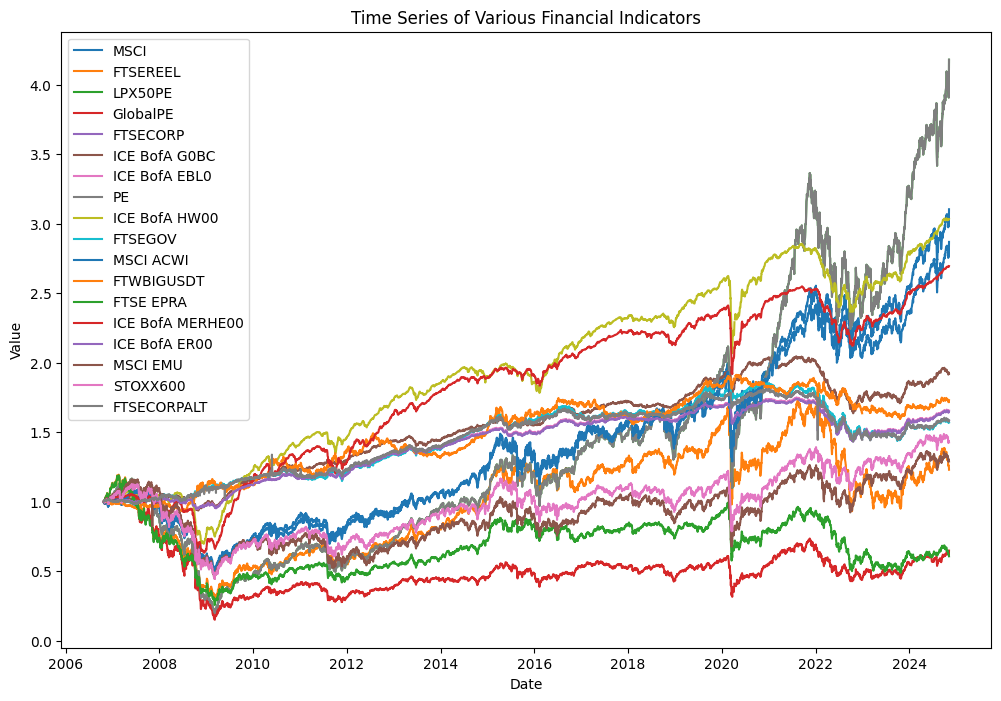

In [62]:
all_in_one_plot(normalized_df)

## We Have Made The Data --> Converting To Csv

In [63]:
normalized_df.to_csv('final_asset_classes.csv', index=True)